<a href="https://www.kaggle.com/code/henryeargueta7/loan-default?scriptVersionId=118165663" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

#reading file and creating a copy of it
file = "/kaggle/input/hmeq-data/hmeq.csv"
hm = pd.read_csv(file)
data = hm.copy()

#checking first 11 rows
data.head(11)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


In [2]:
#checking last 10 rows
data.tail(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5950,0,87500,55938.0,86794.0,DebtCon,Other,15.0,0.0,0.0,223.881040,0.0,16.0,36.753653
5951,0,88300,54004.0,94838.0,DebtCon,Other,16.0,0.0,0.0,193.702051,0.0,15.0,36.262691
5952,0,88500,50240.0,94687.0,DebtCon,Other,16.0,0.0,0.0,214.426206,0.0,16.0,34.751158
5953,0,88800,53307.0,94058.0,DebtCon,Other,16.0,0.0,0.0,218.304978,0.0,15.0,34.242465
5954,0,88900,48919.0,93371.0,DebtCon,Other,15.0,0.0,1.0,205.650159,0.0,15.0,34.818262
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [3]:
#checking for shape of data
data.shape

(5960, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


* 9 columns with type float64
* 2 columns with type int64
* 2 columns with type object (string inside of them)

In [5]:
#checking for missing values
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [6]:
#checking percentage of missing values in each column to see if we need to drop anything
((data.isnull().sum() / (len(data.index))) * 100).sort_values()

BAD         0.000000
LOAN        0.000000
VALUE       1.879195
CLNO        3.724832
REASON      4.228188
JOB         4.681208
CLAGE       5.167785
NINQ        8.557047
YOJ         8.640940
MORTDUE     8.691275
DELINQ      9.731544
DEROG      11.879195
DEBTINC    21.258389
dtype: float64

# **Converting the data types**

In [7]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding the target variable to the list because it's a classification problem
#target variable is categorical
cols.append('BAD')

# changing object type columns to categorical, this will include the "BAD" column
# since we appended it 
for i in cols:
    data[i] = data[i].astype('category')

#checking to see if it worked   
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


# **Analyzing Statistic of the dataset**

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000
DEBTINC,4693.0,33.779915,8.601746,0.524499,29.140031,34.818262,39.003141,203.312149


**Insights**

- The average amount due on existing mortgages is 73,760.82. With a high of 399,550.00 and a minimum of amount of mortgage due of 2,063
- The average approved loan is 18,607.97 with a max of 89,900.00 and a minimum of approved loan of 1,100.00
- 75% of the of clients have been working at their jobs for at least 13 years
- 25% of the clients have been working at their jobs for at least 3 years
- 75% of clients have at least 19 years old credit line
- 25% of clients have at least a 9 year old credit line
- 75% of clients have at least 26 lines of existing credit
- 25% of clients have at least 15 lines of existing credit
- 75% of clients have at least 39% of debt to income ratio
- 25% of clients have at least 29% of debt to income ratio

In [9]:
#checking summary of categorical data
data.describe(include=['category']).T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


**Insights**

- For the 'BAD' column the count is 5960 meaning the data gathered is 100% and the most frequent category is '0'. This means that there are 4,771 clients that have their loan repaid
- For the 'REASON' column the count is 5708 meaning we are missing data from 252 clients. The most popular reason for loan request is debt consolidation, with a count of 3,928
- For the 'JOB' column the count is 5681 meanind we are missing data from 279 clients. The most popular job type is 'Other' with a count of 2,388

# **looking at the unique values in all the catergorical variables**

In [10]:
# Checking the count of unique values in each categorical column 

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts(normalize= True))
    print('*'*40)

Unique values in BAD are :
0    0.800503
1    0.199497
Name: BAD, dtype: float64
****************************************
Unique values in REASON are :
DebtCon    0.688157
HomeImp    0.311843
Name: REASON, dtype: float64
****************************************
Unique values in JOB are :
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: JOB, dtype: float64
****************************************


**Insights:**


**The ugly truth** 
- 19.95% (1189 / 5960) of the clients have defaulted on their loan 

**Inside info**
- 80.05% (4,771 / 5960) of clients have their loan repaid
- 68.82% (3928 / 5708)  of a loan request is for debt consolidation, meaning that clients are taking out a new loan to pay off liabilities and consumer debts
- 31.18% (1780 / 5708)  of loan request from clients are for home improvement
- 42.03% (2388 / 5681)  of clients type of job are listed as other
- 22.46% (1276 / 5681)  of clients type of job are listed as 'ProfExe'
- 16.69% (948 / 5681)   of clients type of job are listed as Office
- 13.50% (767 /5681)    of clients type of job are listed as Manager
- 3.40%  (193 / 5681)   of clients are self employed
- 1.92%  (109 / 5681)   of clients type of jobs are listed as Sales 

## **Exploratory Data Analysis (EDA) and Visualization**

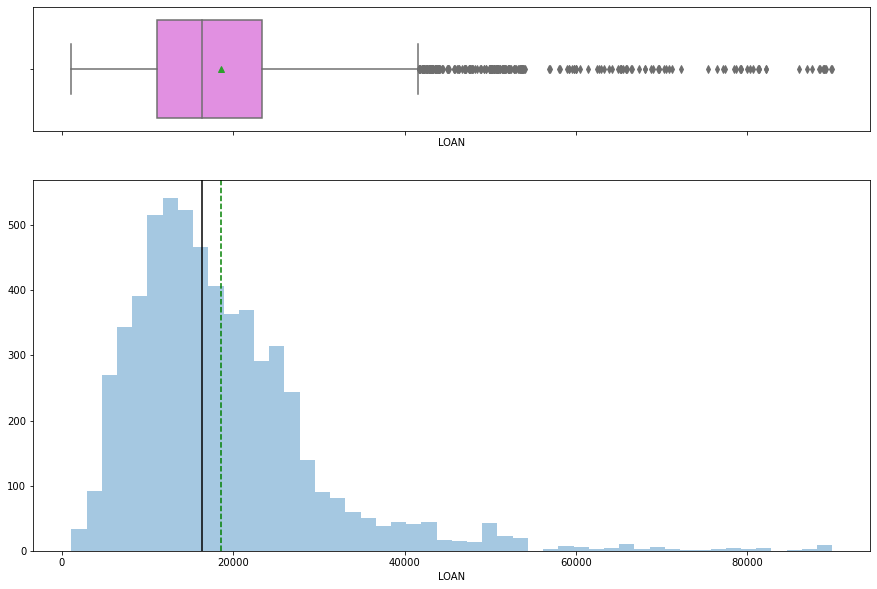

In [11]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# writing a method to create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram


# Building the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])

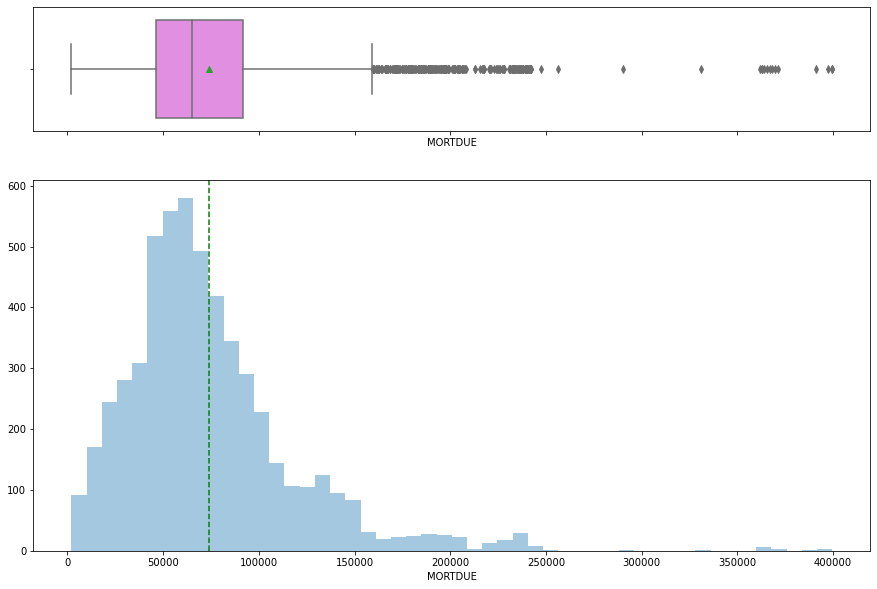

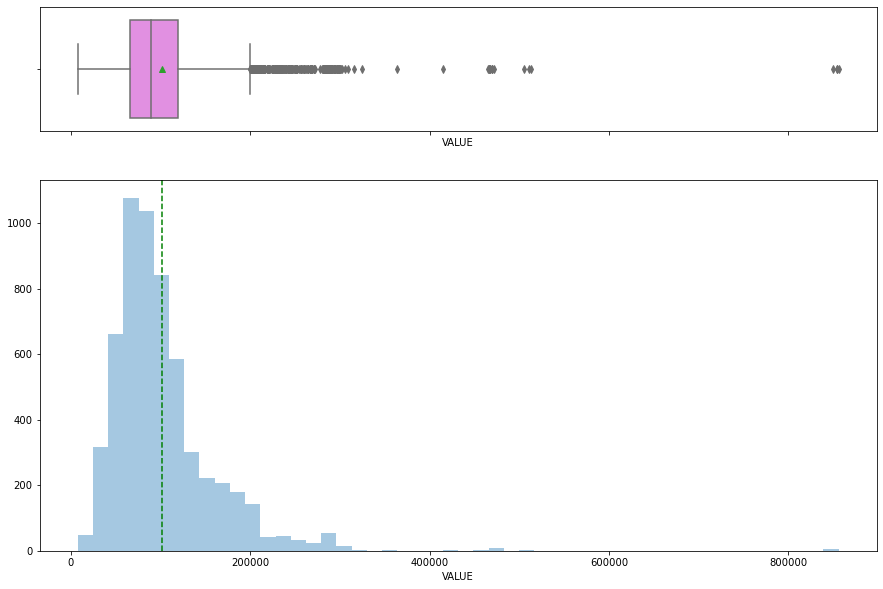

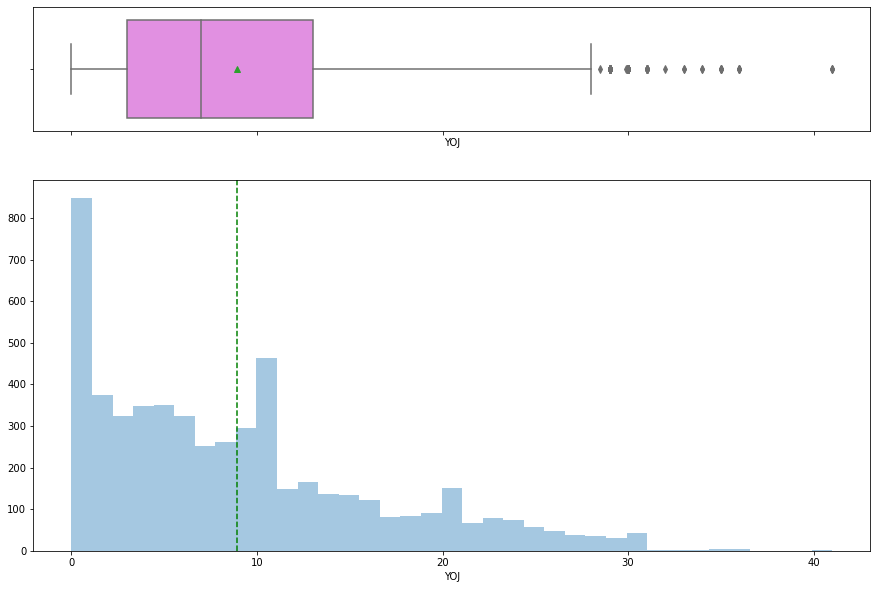

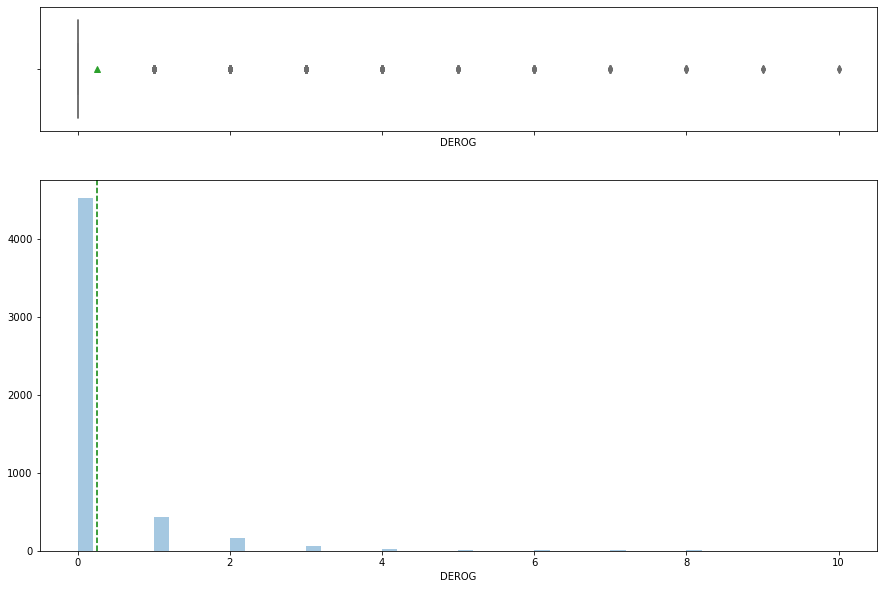

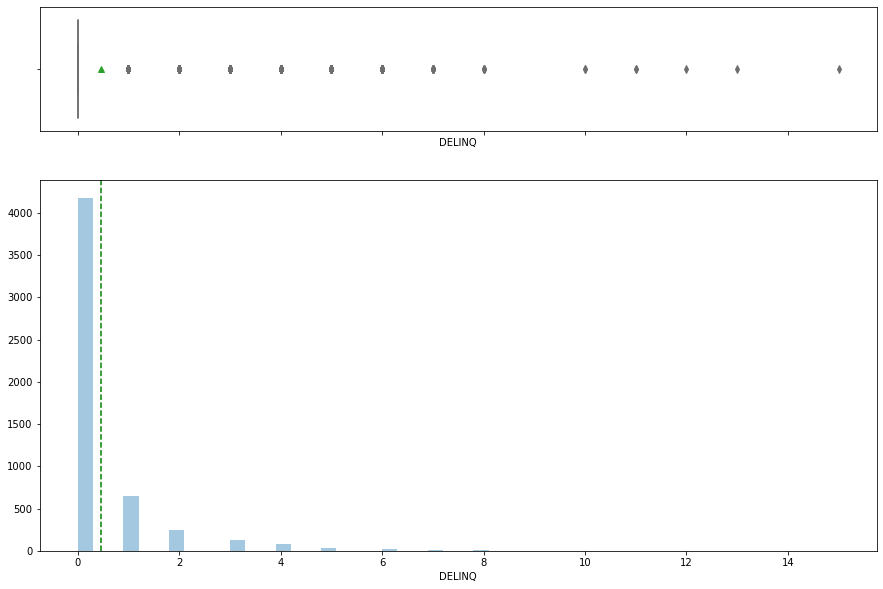

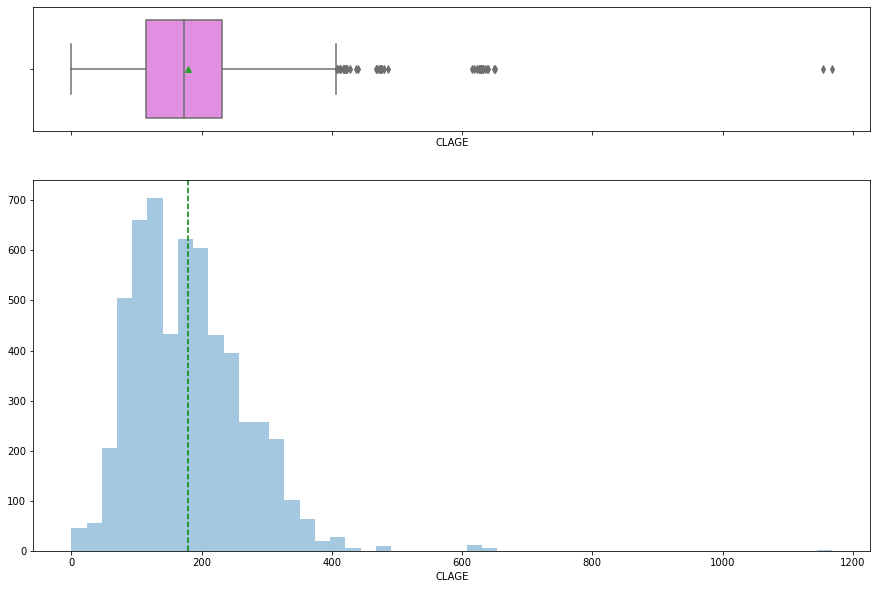

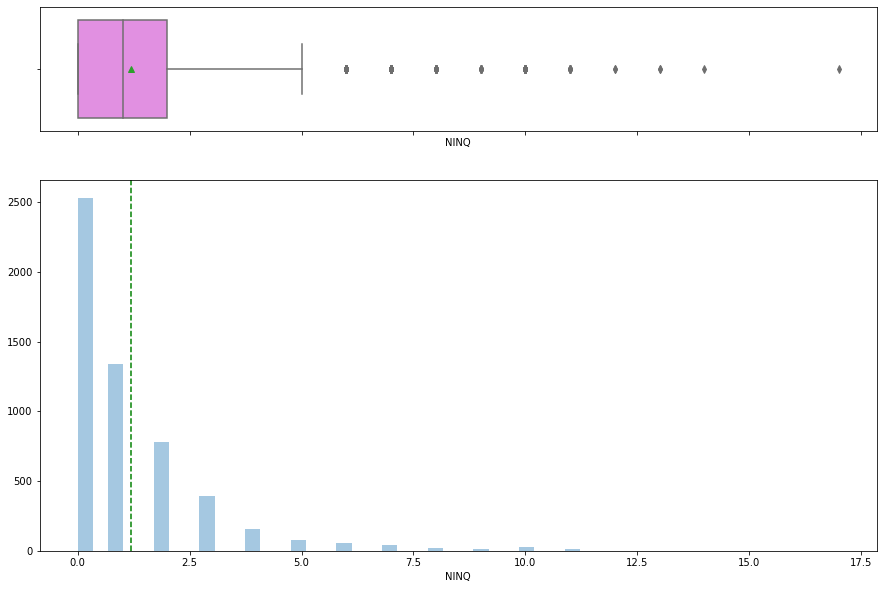

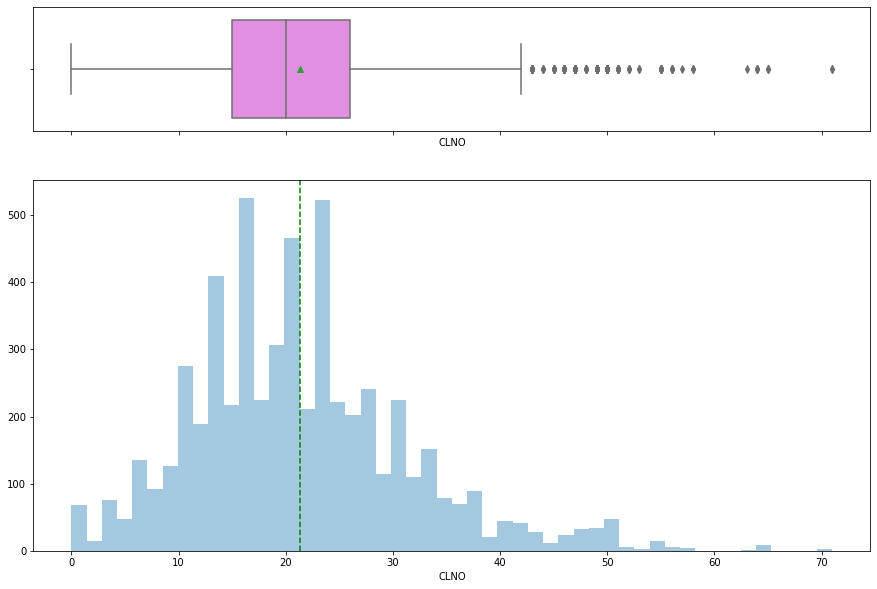

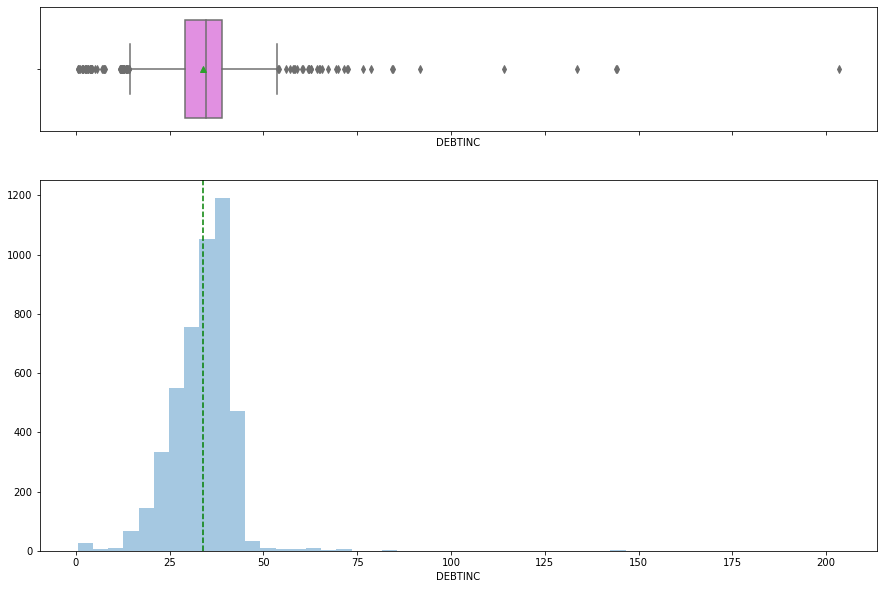

In [12]:
# built a histograms boxplot for the other variables
# using a forloop that goes through all of them excluding 
# the categorical data and 'LOAN' since we did it above

useful_columns = ['MORTDUE','VALUE','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC']

for i in useful_columns:
    histogram_boxplot(data[i])

**Insights:**

**"MORTDUE":**
- The 'MORTDUE' Column is skewed to the right with majority of clients owing between 46,275 (q1) and 91,488 (q3)
- The green line marks the average amount due on existing mortgage which is 73,760.81

**"VALUE":**
- The 'VALUE' columns is skewed to the right with majority of clients property value lie between 66,075.50 (q1) and 119,824.25 (q3)
- The green line marks the average property value which is 101,776.05 (mean)
- There are more clients within the 66,075.50 range than the 119,824.25

**"YOJ":**
- The 'YOJ' column is skewed to the right with in total most the clients have been in their jobs between 3 (q1) and 13 (q3) years
- There are more than 800 clients with 0 years in the job, making the average years on job around 9 (8.92 marked with a green line)

**"DEROG":**
- Most clients have 0 derogatory reports with the average being 0.25 (marked with the green line)

**"DELINQ":**
- Most of the clients have 0 delinquent credit lines. Total average delinquent credit lines from the data collected is 0.45 (marked with a green line)

**"CLAGE":**
- The 'CLAGE' column is skewed to the right. Majority of clients lie between 115 months (9years and 7 months) and 232 months (19 years and 4 months) of oldest credit line
- The average (marked with a green line) age of the oldest credit line is 179 months (14 years and 11 months)

**"NINQ":**
- Most of the clients fall between 0 and and 2 recent inquiries, making the average of recent inquiries around 1

**"CLNO":**
- Majority of the clients fall between 15 and 26 of existing credit lines, with an average of 21 (marked with a green line) existing credit lines

**"DEBTINC":**
- Most of the clients debt to income fall between 29.14% and 39% with an average (marked in a green line) of 33.78%
- The graph also shows a large population; More than 1000 clients with more than 33.78% and between 39%  

#  **Univariate Analysis - Categorical Data**

In [13]:
# Method/Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

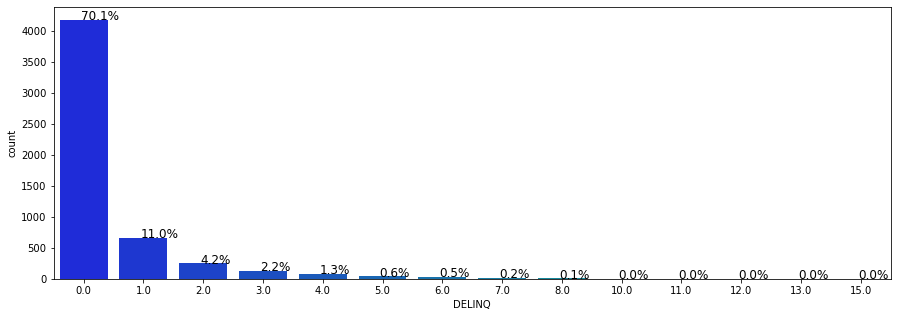

In [14]:
#Building barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

**Insights**

- 70.1% of clients have 0 delinquency credit lines
- 11.0% of clients have 1 delinquency credit line
- 4.2% of clients have 2 credit lines with delinquent status
- 2.2% of clients have 3 credit lines with delinquent status 
- 1.3% of clients have 4 credit lines with delinquent status
- 0.6% of clients have 5 credit lines with delinquent status
- 0.5% of clients have 6 credit lines with delinquent status
- 0.2% of clients have 7 credit lines with delinquent status
- 0.1% of clients have 8 credit lines with delinquent status
- 0% of clients have 10 or more credit lines with delinquent status 

# **Analyzing Histogram and Boxplot for other variables**

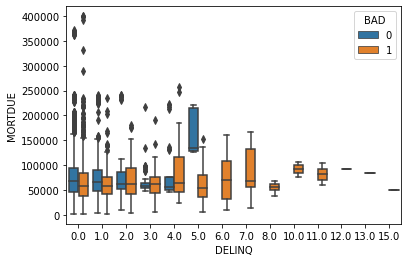

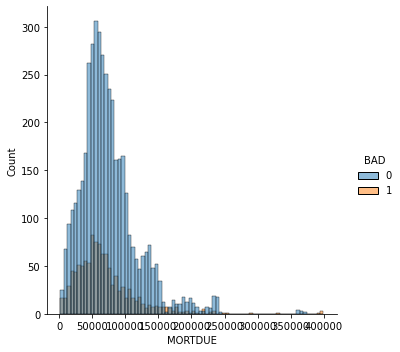

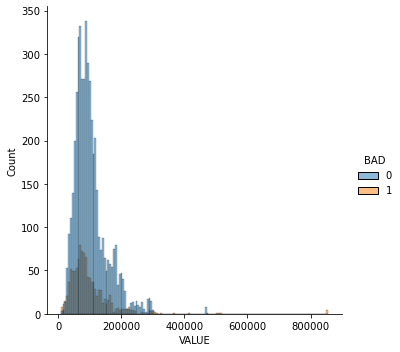

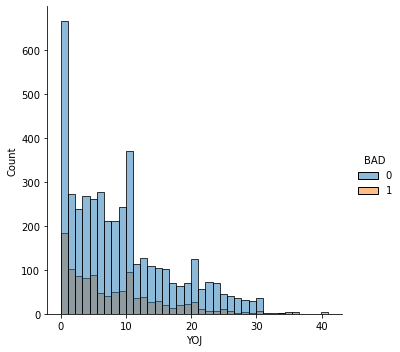

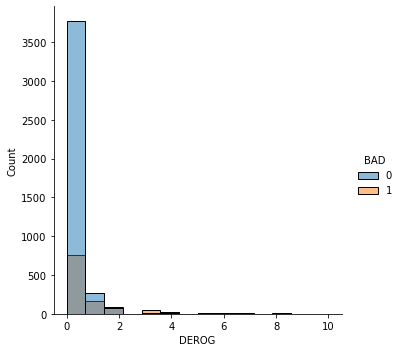

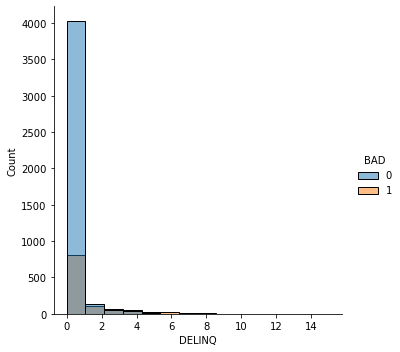

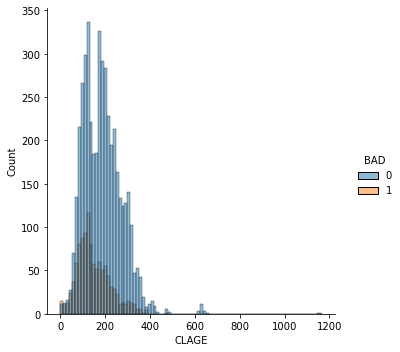

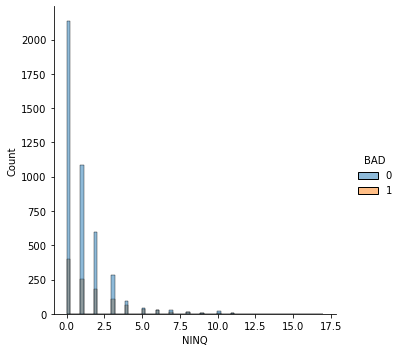

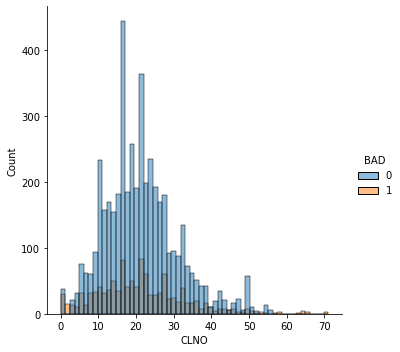

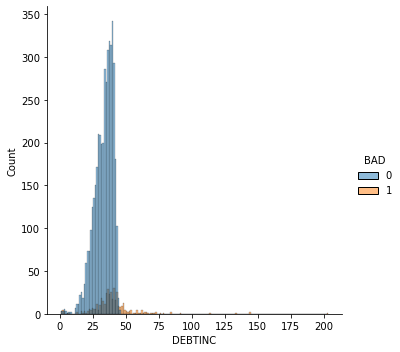

In [15]:
sns.boxplot(data = data, x = 'DELINQ', y = 'MORTDUE', hue = 'BAD')
for data_info in useful_columns:
    sns.displot(data, x = data_info, hue = 'BAD')

**Insights:**
- There are more clients defaulting on loans with 5 or more delinquent credit lines

# **Bivariate Analysis**

<AxesSubplot:xlabel='BAD', ylabel='LOAN'>

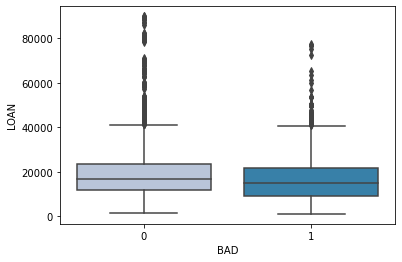

In [16]:
sns.boxplot(data["BAD"],data['LOAN'],palette="PuBu")

**Insights**
- boxplot indicates that there's roughly around the same loan amount being defaulted as there are being repaid
- Also we can see that the clients with an approved loan of grater than 80,000 are more likely to repay their loan

# **Bivariate Analysis: Two Continuous Variables**

<AxesSubplot:xlabel='VALUE', ylabel='MORTDUE'>

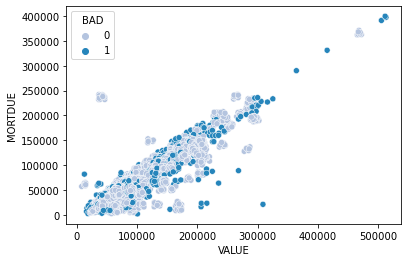

In [17]:
sns.scatterplot(data["VALUE"],data['MORTDUE'], hue=data['BAD'],palette="PuBu")

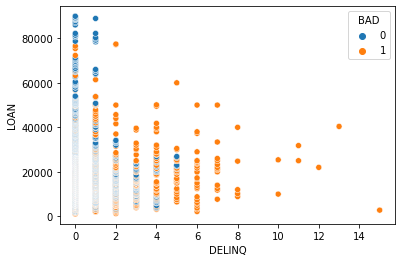

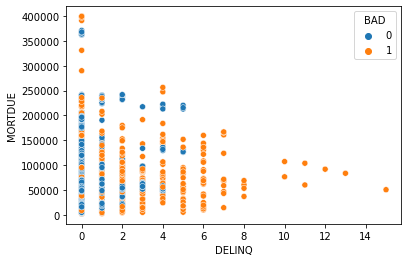

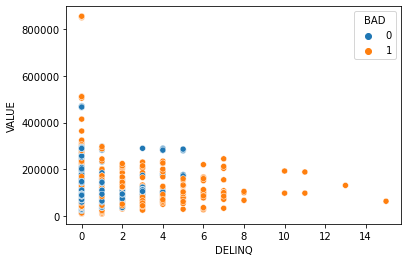

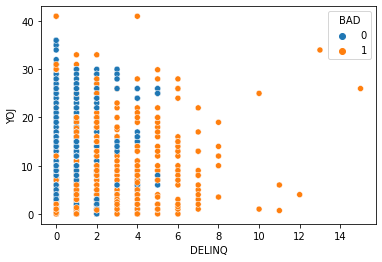

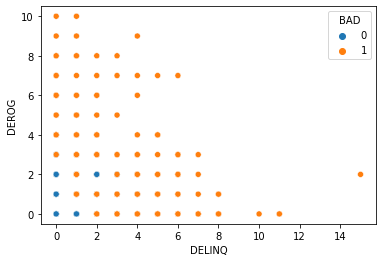

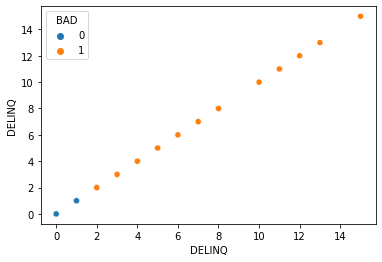

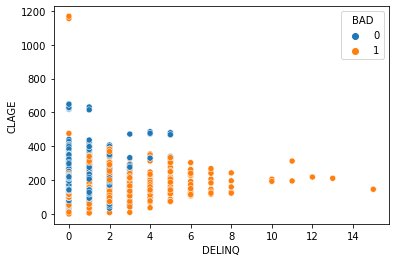

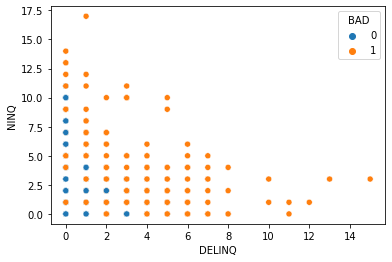

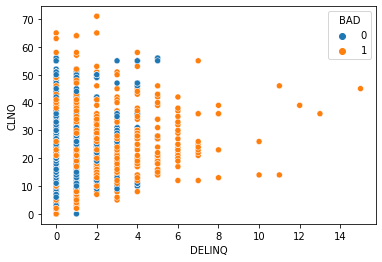

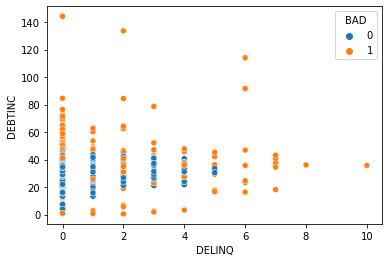

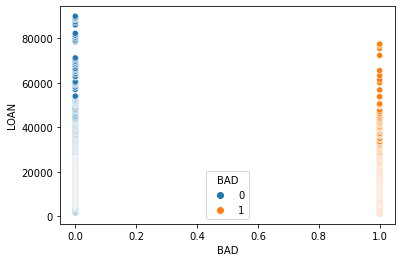

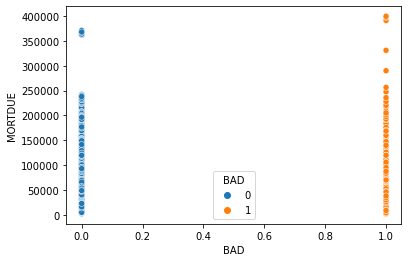

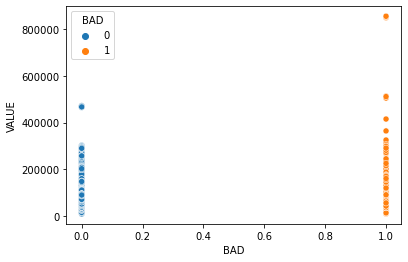

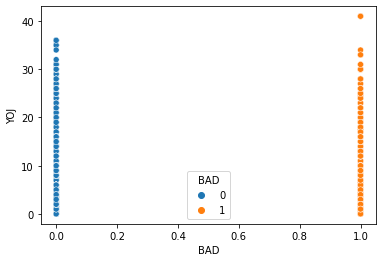

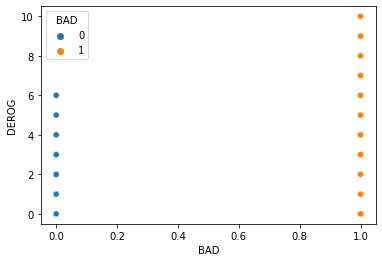

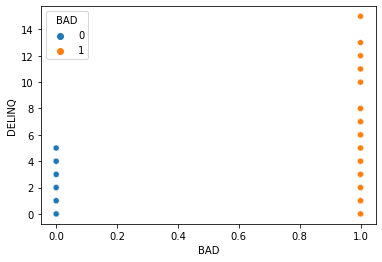

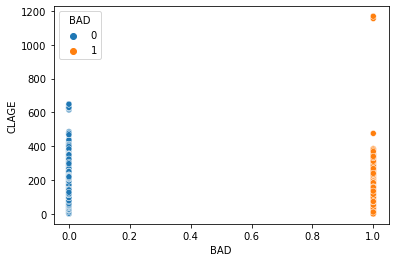

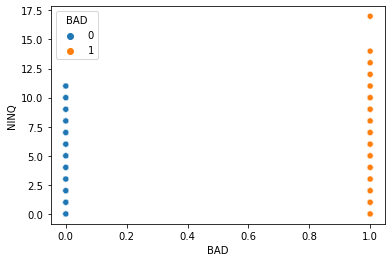

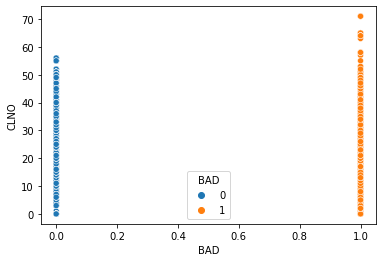

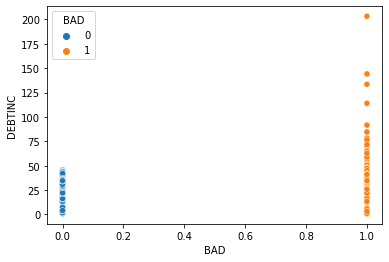

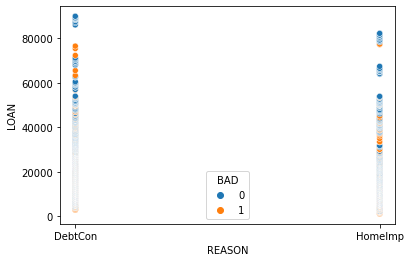

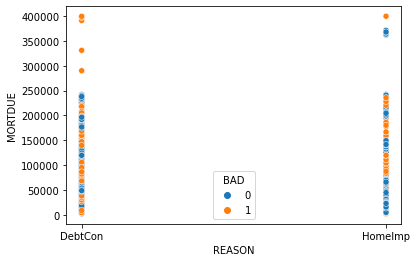

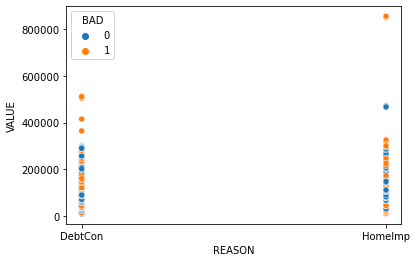

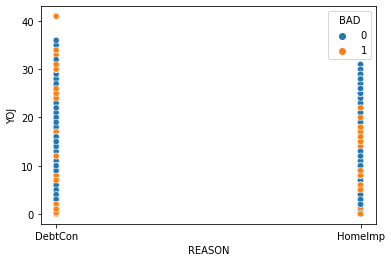

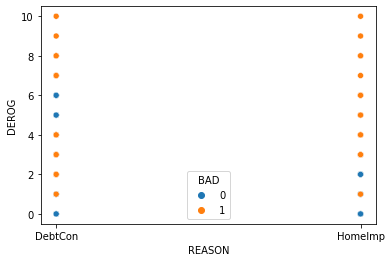

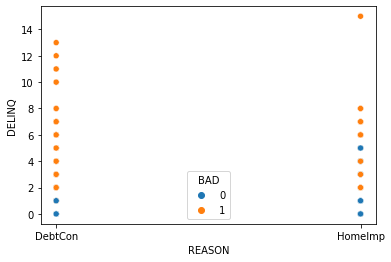

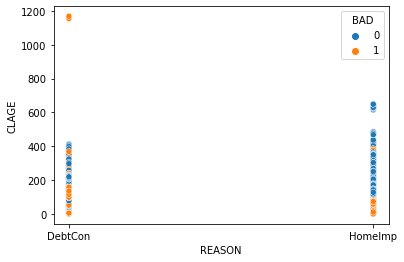

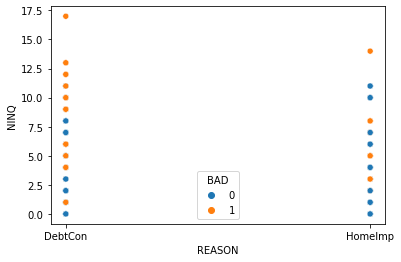

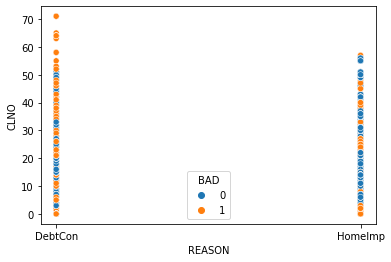

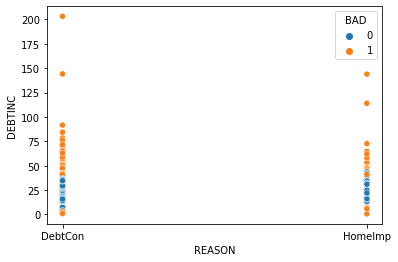

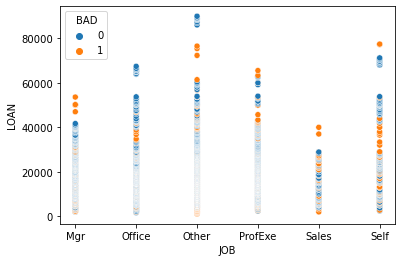

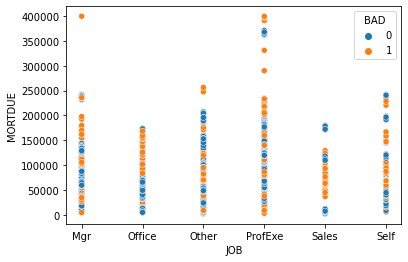

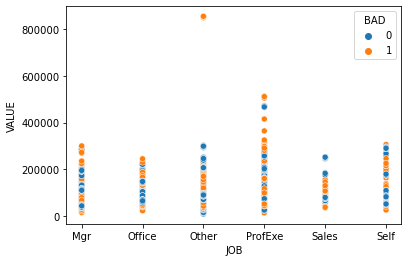

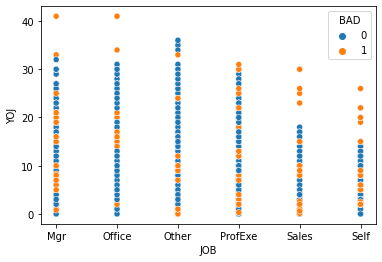

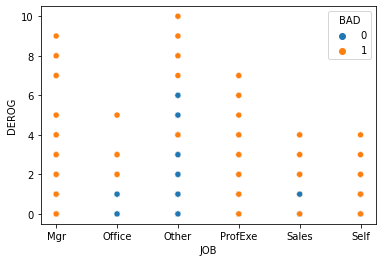

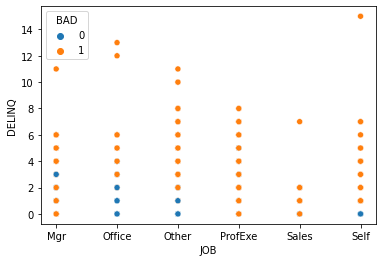

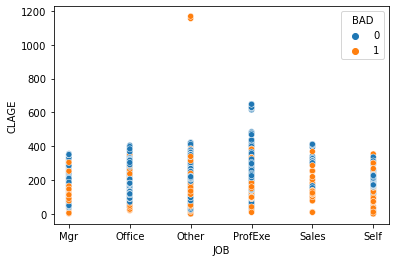

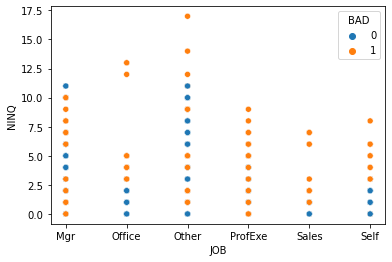

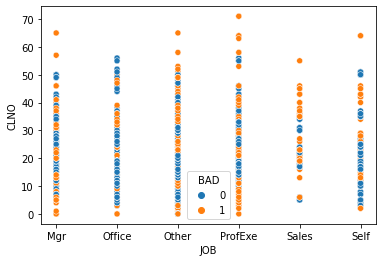

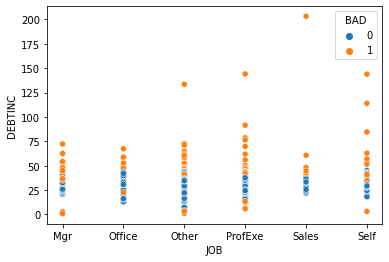

In [18]:
# created an array which holds the columns we're looking into and 
# inside the array there is a for loop going through each one of them 
# and creating a different graph for each. I also looked into the categorical data
# for more insight

useful_columns = ['LOAN','MORTDUE','VALUE','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC']


a1 = [plt.show(sns.scatterplot(data['DELINQ'],data[i], hue=data['BAD'])) for i in useful_columns]
b1 = [plt.show(sns.scatterplot(data['BAD'],data[i], hue=data['BAD'])) for i in useful_columns]
c1 = [plt.show(sns.scatterplot(data['REASON'],data[i], hue=data['BAD'])) for i in useful_columns]
d1 = [plt.show(sns.scatterplot(data['JOB'],data[i], hue=data['BAD'])) for i in useful_columns]



**Insights:**

**DELINQ & LOAN & MORTDUE:**
- As the number of deliquent credit lines increase, the amount of loan approval decreases, and the amount of the current property value slightly increases. This is pretty normal

**DELINQ & NINQ:**
- There are less number of recent credit inquiries as the number of delinquent credit lines increase

**DELINQ & CLNO:**
- Anybody with 5 or more delinquent credit lines tends to have more than 10 but less than 50 existing credit lines

**DELINQ & DEBTINC:**
- There are a few outcasts as the debt to income ratio goes up, with people having 2 and 6 delinquent credit lines

**BAD & MORTDUE:**
- There are more outcasts of people defaulting on a mortgage that's 250,000 and above

**BAD & VALUE:**
- There are more outcasts of people defaulting on their loans on current property values that are 400,000 and above

**BAD & DEROG:**
- There are more clients defaulting on their loans with 6 or more derogatory reports

**BAD & DELINQ:**
- Clients with 6 or more delinquent credit lines are defaulting loans

**BAD & NINQ:**
- Clients with 12 or more recent credit inquiries are defaulting on their loans

**BAD & CLNO:**
- Clients with more than 60 existing credit lines are defaulting on their loans

**BAD & DEBTINC:**
- Clients with more than 50% on their debt to income are defaulting on their loans

# **Bivariate Analysis:  BAD vs Categorical Variables**

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
--------------------------------------------------------------------------------------------------------------


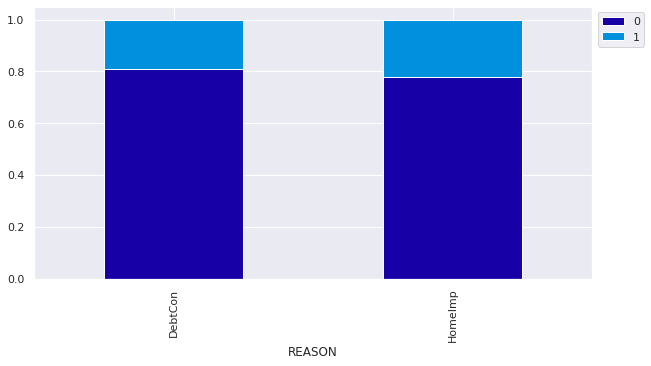

In [19]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*110)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

BAD     0     1   All
BAD                  
0    4771     0  4771
1       0  1189  1189
All  4771  1189  5960
--------------------------------------------------------------------------------------------------------------


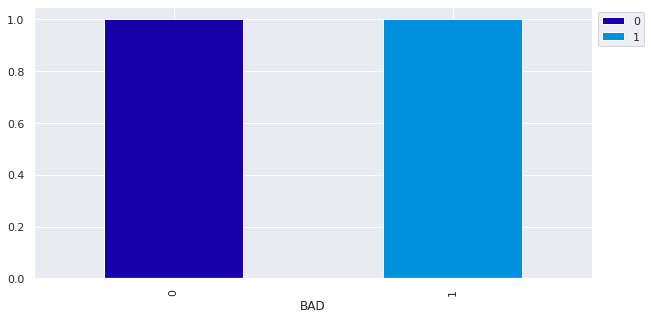

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
--------------------------------------------------------------------------------------------------------------


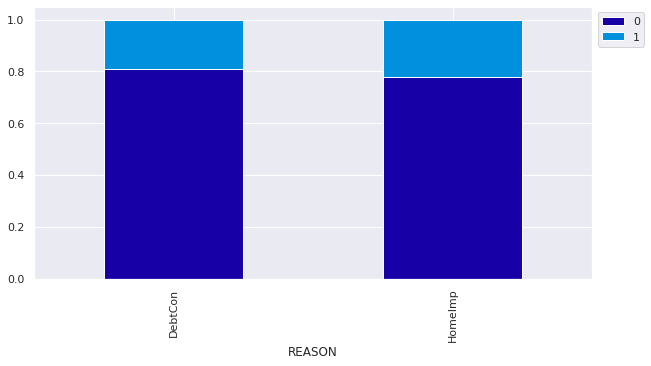

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
--------------------------------------------------------------------------------------------------------------


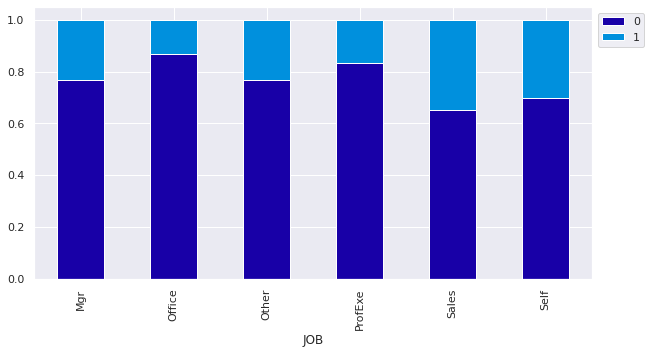

In [20]:
# created an array holding the categorical data and
# a for loop that goes through them 

categorical = ['BAD', 'REASON', 'JOB']
for i in categorical:
    stacked_plot(data[i])

**Insights:**

**BAD & BAD:**
- There are 4,771 clients whom have repaid their loans
- There are 1,189 clients whome have defaulted on thier loans

**BAD & REASON:**
- Home improvement clients have more default loans than debt consolidation cliends

**BAD & JOB:**
- Clients in the sales job tend to have more loan defaults then others

# **Multivariate Analysis**

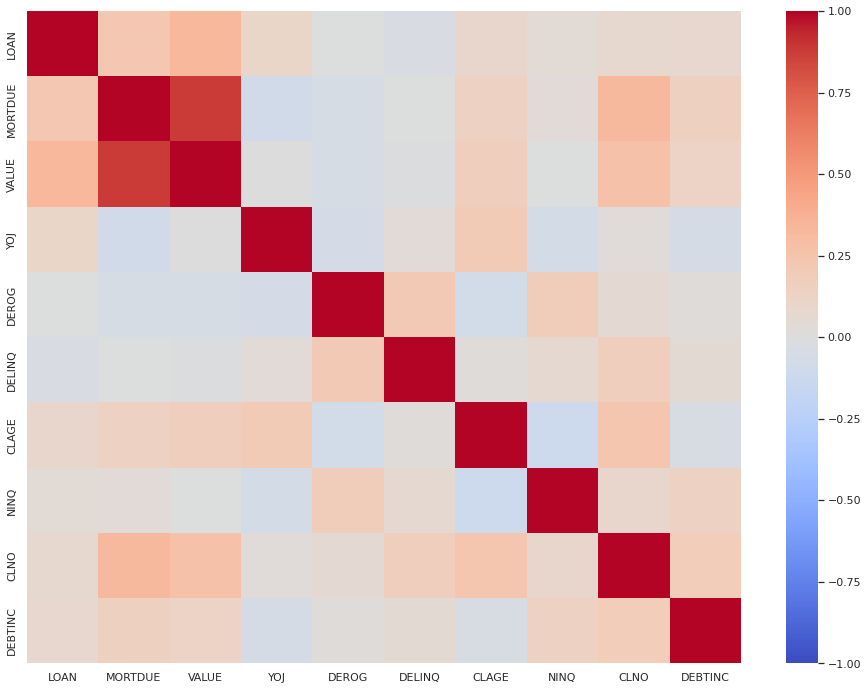

In [21]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns

corr = data[numerical_col].corr()

# plot the heatmap

plt.figure(figsize=(16,12))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

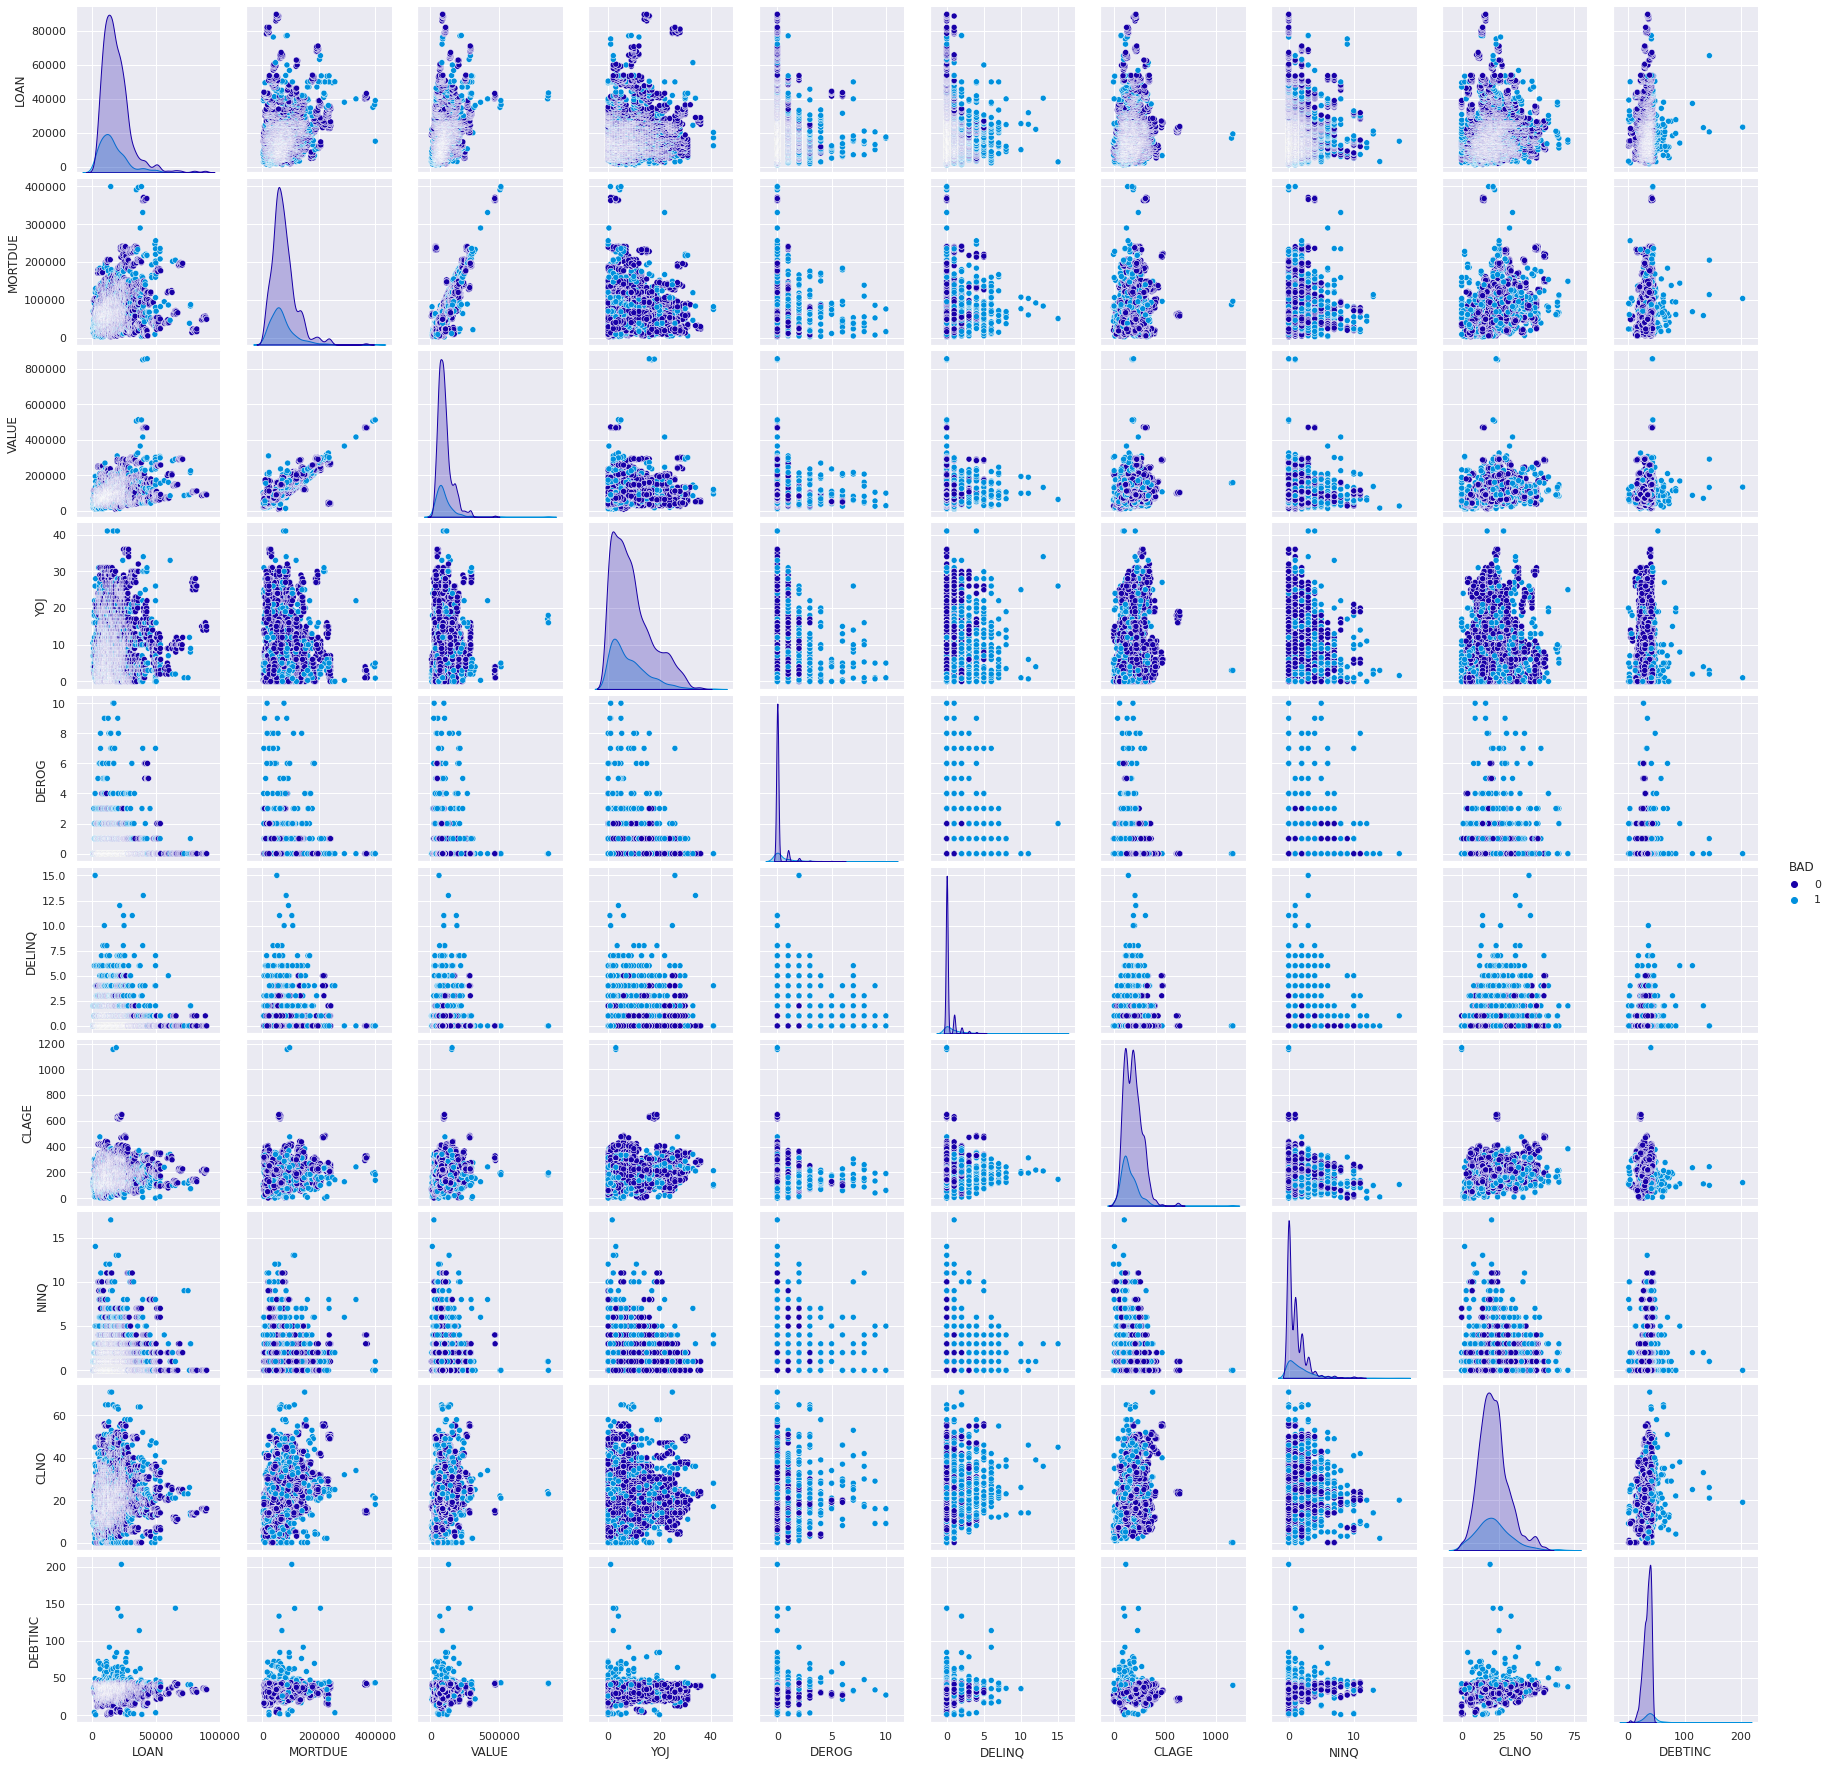

In [22]:
# Build pairplot for the data with hue = 'BAD'

sns.pairplot(data, hue = 'BAD')

#### Treating Outliers

In [23]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1= df[col].quantile(q = 0.25) # 25th quantile
    Q3= df[col].quantile(q = 0.75)  # 75th quantile
    IQR= Q3 - Q1   # IQR Range
    Lower_Whisker = Q1 - (1.5*IQR)  #define lower whisker
    Upper_Whisker = Q3 + (1.5*IQR)  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df


df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)



#### Adding new columns in the dataset for each column which has missing values 

In [24]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [25]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)
    
# checking to see if it worked    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   BAD                          5960 non-null   category
 1   LOAN                         5960 non-null   float64 
 2   MORTDUE                      5442 non-null   float64 
 3   VALUE                        5848 non-null   float64 
 4   REASON                       5708 non-null   category
 5   JOB                          5681 non-null   category
 6   YOJ                          5445 non-null   float64 
 7   DEROG                        5252 non-null   float64 
 8   DELINQ                       5380 non-null   float64 
 9   CLAGE                        5652 non-null   float64 
 10  NINQ                         5450 non-null   float64 
 11  CLNO                         5738 non-null   float64 
 12  DEBTINC                      4693 non-null   float64 
 13  MOR

#### Filling missing values in numerical columns with median and mode in categorical variables

In [26]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Selecting numeric columns.
num_data = df.select_dtypes('number')

# Selecting string and object columns.
cat_data = df.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Filling numeric columns with median.
df[num_data.columns] = num_data.fillna(num_data.median())

# Filling object columns with model.
for column in cat_data:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)

#checking to see if worked
df.isnull().sum()

BAD                            0
LOAN                           0
MORTDUE                        0
VALUE                          0
REASON                         0
JOB                            0
YOJ                            0
DEROG                          0
DELINQ                         0
CLAGE                          0
NINQ                           0
CLNO                           0
DEBTINC                        0
MORTDUE_missing_values_flag    0
VALUE_missing_values_flag      0
REASON_missing_values_flag     0
JOB_missing_values_flag        0
YOJ_missing_values_flag        0
DEROG_missing_values_flag      0
DELINQ_missing_values_flag     0
CLAGE_missing_values_flag      0
NINQ_missing_values_flag       0
CLNO_missing_values_flag       0
DEBTINC_missing_values_flag    0
dtype: int64

In [27]:
df.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC',
       'MORTDUE_missing_values_flag', 'VALUE_missing_values_flag',
       'REASON_missing_values_flag', 'JOB_missing_values_flag',
       'YOJ_missing_values_flag', 'DEROG_missing_values_flag',
       'DELINQ_missing_values_flag', 'CLAGE_missing_values_flag',
       'NINQ_missing_values_flag', 'CLNO_missing_values_flag',
       'DEBTINC_missing_values_flag'],
      dtype='object')

# **Data Preparation**

### **Separating the target variable from other variables**

          MORTDUE          VALUE       YOJ     DEROG    DELINQ       CLAGE  \
BAD                                                                          
0    74829.249055  102595.921018  9.154941  0.134217  0.245133  187.002355   
1    69460.452973   98172.846227  8.027802  0.707804  1.229185  150.190183   

         NINQ       CLNO    DEBTINC  
BAD                                  
0    1.032749  21.317036  33.253129  
1    1.782765  21.211268  39.387645  


<AxesSubplot:>

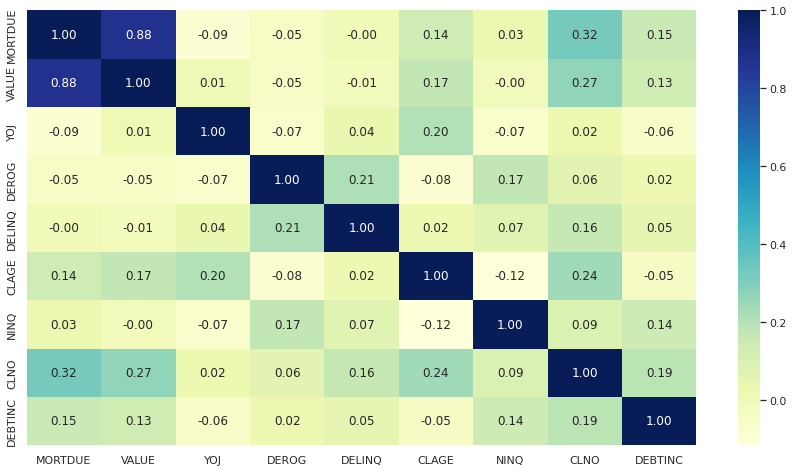

In [28]:
numerical_columns = ['MORTDUE','VALUE','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC']
#categorical_columns = ['BAD','REASON','JOB']
categorical_columns = ['BAD']

print(data.groupby(['BAD'])[numerical_columns].mean())

plt.figure(figsize = (15,8))
sns.heatmap(data[numerical_columns].corr(), annot = True, fmt='0.2f', cmap = 'YlGnBu')

In [29]:
# Droping the dependent variable from the dataframe and creating the X(independent variable) matrix
X = df.drop(['BAD'], axis=1)

# Creating dummy variables for the categorical variables - Hint: use the get_dummies() function
X = pd.get_dummies(X, drop_first=True)

# Creating y(dependent varibale)
y = df.BAD

# Spliting the data into 70% training and 30% test set
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.30, random_state = 1)


In [30]:
# checking to see if everything looks good
print(f'X_train size :{X_train.size}\ny_train size :{y_train.size} (70% = 5960 *(0.70)) \n')
print(f'X_test size :{X_test.size}\ny_test size :{y_test.size} (30% = 5960 *(0.30))\n\n')


X_train size :112644
y_train size :4172 (70% = 5960 *(0.70)) 

X_test size :48276
y_test size :1788 (30% = 5960 *(0.30))




### **Building a Logistic Regression Model** 

In [31]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Eligible', 'Not Eligible'], yticklabels=['Eligible', 'Not Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Defining the Logistic regression model
model = LogisticRegression()

# Fitting the model on the training data 
model.fit(X_train, y_train)

LogisticRegression()

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      3355
           1       0.69      0.02      0.05       817

    accuracy                           0.81      4172
   macro avg       0.75      0.51      0.47      4172
weighted avg       0.78      0.81      0.73      4172



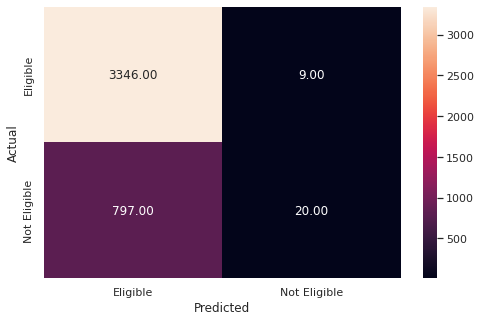

In [32]:
#Predict for train set
y_pred_train = model.predict(X_train)

#checking the performance on the train dataset
metrics_score(y_train, y_pred_train)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1416
           1       0.43      0.01      0.02       372

    accuracy                           0.79      1788
   macro avg       0.61      0.50      0.45      1788
weighted avg       0.72      0.79      0.70      1788



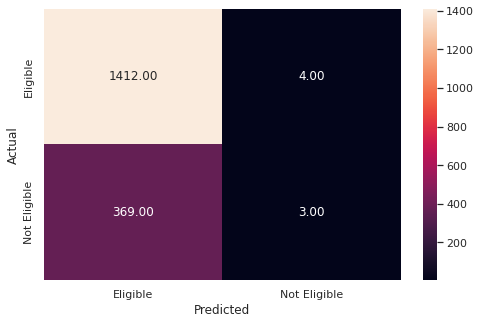

In [33]:
#Predict for test set
y_pred_test = model.predict(X_test)

#checking the performance on the test dataset
metrics_score(y_test, y_pred_test)



#### Checking the coefficients, and checking which variables are important and how they affect the process of loan approval

In [34]:
# Printing the coefficients of logistic regression
pd.DataFrame(model.coef_, columns = X.columns).T.sort_values(by = 0, ascending = False)

,0
DEBTINC,0.020758
CLNO,0.007849
NINQ,0.004581
DEBTINC_missing_values_flag,0.004216
VALUE_missing_values_flag,0.000671
JOB_Self,0.000183
REASON_HomeImp,0.000170
JOB_Sales,0.000131
CLAGE_missing_values_flag,0.000110
JOB_Other,0.000088


**Insights:**
- 'NINQ' and 'DEBTINC' have the highest coefficients, meaning we can tell whom could be defaulting based on the debt to income ratios, and or number of recent credit inquiries and move down from the list from there

# **Building a Decision Tree Model**

#### Data Preparation for the tree based model

In [35]:
# Add binary flags
# List of columns that has missing values in it
missing_col = [col for col in data.columns if data[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data,colmn)

#  Treating Missing values in numerical columns with median and mode in categorical variables
# Selecting numeric columns.
num_data = data.select_dtypes('number')

# Selecting string and object columns.
cat_data = data.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Filling numeric columns with median.
data[num_data.columns] = num_data.fillna(num_data.median())

# Filling object columns with model.
for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)
    

#### Separating the target variable y and independent variable x

In [36]:
# Droping dependent variable from dataframe and creating the X(independent variable) matrix
X = data.drop(['BAD'], axis=1)

# Creating dummy variables for the categorical variables - Hint: use the get_dummies() function
X = pd.get_dummies(X, drop_first=True)

# Creating y(dependent varibale)
y = df.BAD

# Splitiing the data into training and test set
(x_train, x_test, y_train, y_test) = train_test_split(X, y, test_size = 0.30, random_state = 1, stratify = y) 

#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 1, class_weight={0: 0.2, 1: 0.8})

#fitting Decision tree model
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



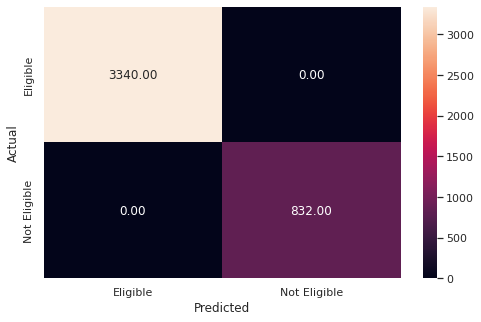

In [37]:
# Checking performance on the training data

y_train_pred_dt = dt.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1431
           1       0.74      0.62      0.68       357

    accuracy                           0.88      1788
   macro avg       0.82      0.78      0.80      1788
weighted avg       0.88      0.88      0.88      1788



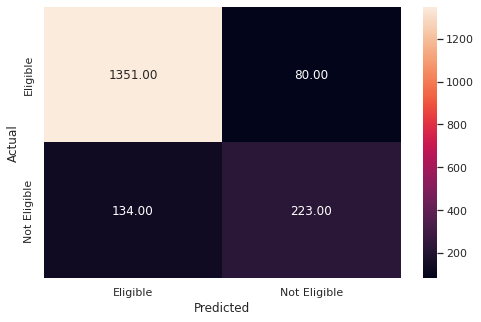

In [38]:
# Checking performance on the testing data
y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

#### Using GridSearchCV for Hyperparameter tuning on the model

In [39]:
# Choosing the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)


# Grid of parameters to choose from
# parameters = {'max_depth': np.arange(2, 30), 
#               'criterion': ['gini', 'entropy'],
#               'max_leaf_nodes' : [2, 3, 5, 10, 15],
#               'min_samples_leaf': [2, 5, 10, 20, 25],
#               'min_impurity_decrease' : [0.0001, 0.001, 0.01, 0.1]
#              }

parameters = {"max_depth": np.arange(2,30)
             ,"min_samples_leaf": [1,2,5,7,10]
             ,"max_leaf_nodes": [2,3,5,10,15]
             ,"min_impurity_decrease":[0.0001,0.001,0.01,0.1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)


# Runing the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)


# Fiting the GridSearch on train dataset
gridCV = gridCV.fit(x_train, y_train)


# Seting the clf to the best combination of parameters
dtree_estimator = gridCV.best_estimator_


# Fiting the best algorithm to the data. 
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=8,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      3340
           1       0.62      0.82      0.71       832

    accuracy                           0.86      4172
   macro avg       0.78      0.85      0.81      4172
weighted avg       0.89      0.86      0.87      4172



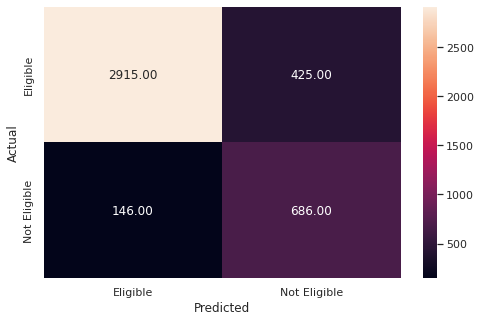

In [40]:
# Checking performance on the training data based on the tuned model
y_train_pred_dt = dtree_estimator.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.94      0.87      0.91      1431
           1       0.60      0.78      0.68       357

    accuracy                           0.85      1788
   macro avg       0.77      0.82      0.79      1788
weighted avg       0.87      0.85      0.86      1788



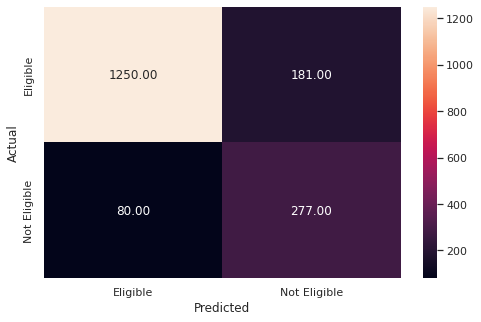

In [41]:
# Checking performance on the testing data based on the tuned model
y_test_pred_dt = dtree_estimator.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

#### Plotting the Decision Tree

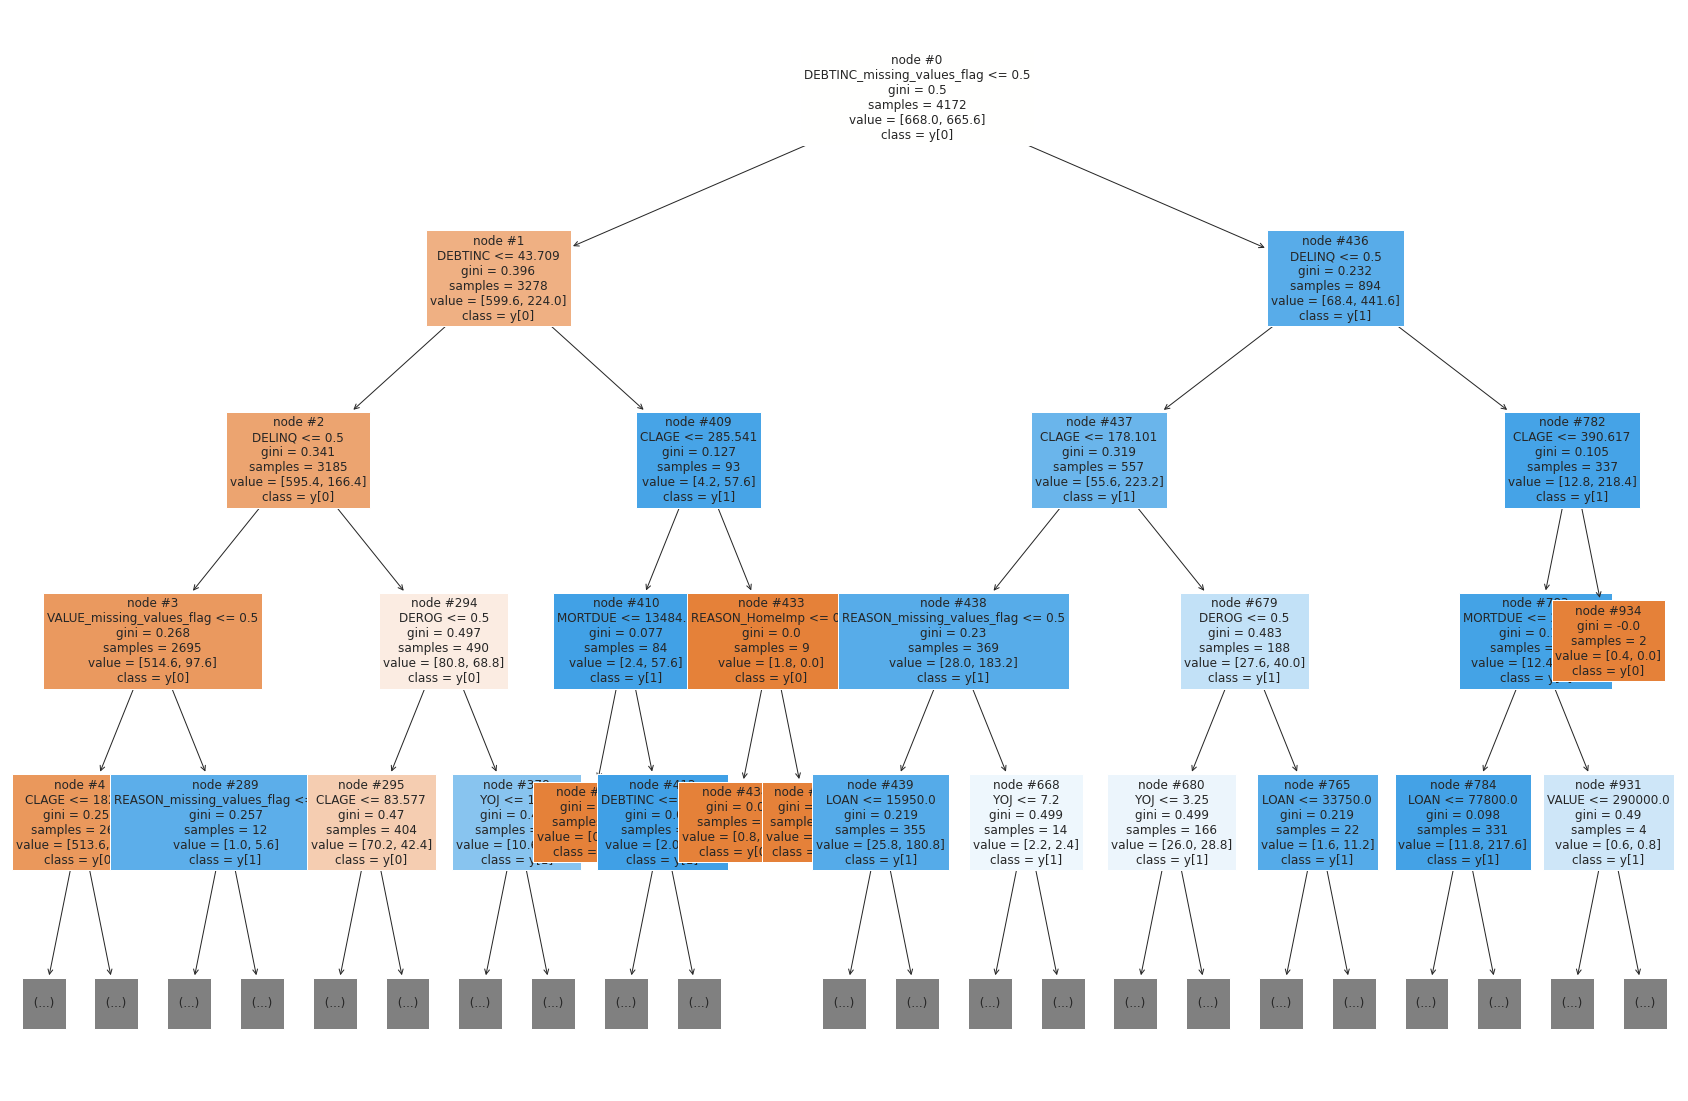

In [42]:
# Plotinig the decision  tree and analyze it to build the decision rule
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

# **Building a Random Forest Classifier**

In [43]:
# Defining Random forest CLassifier
rf_estimator = RandomForestClassifier(random_state = 1)
rf_estimator.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



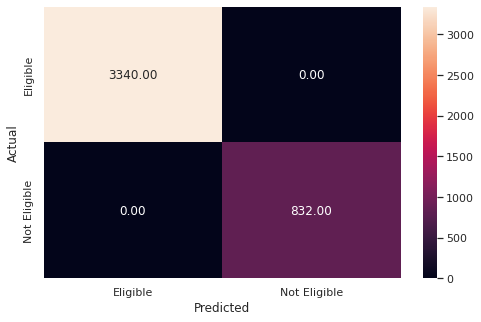

In [44]:
#Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)
metrics_score(y_train, y_pred_train_rf)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1431
           1       0.84      0.68      0.75       357

    accuracy                           0.91      1788
   macro avg       0.88      0.82      0.85      1788
weighted avg       0.91      0.91      0.91      1788



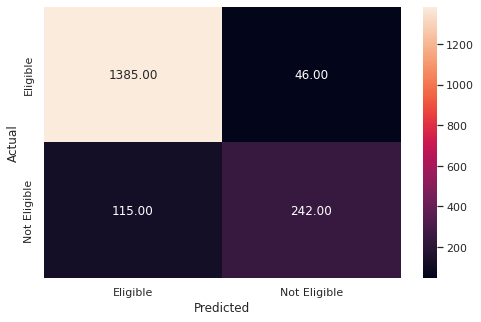

In [45]:
# Checking performance on the test data
y_pred_test_rf = rf_estimator.predict(x_test)
metrics_score(y_test, y_pred_test_rf)

# **Building a Random Forest model with Class Weights**

In [46]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}
rf_estimator_wt = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

# Fitting Random Forest model
rf_estimator_wt.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



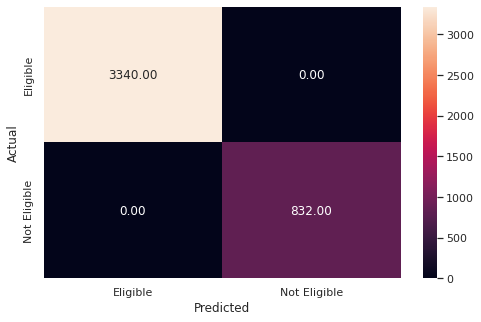

In [47]:
# Checking performance on the train data
y_pred_train_rf = rf_estimator_wt.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1431
           1       0.84      0.64      0.73       357

    accuracy                           0.90      1788
   macro avg       0.88      0.81      0.83      1788
weighted avg       0.90      0.90      0.90      1788



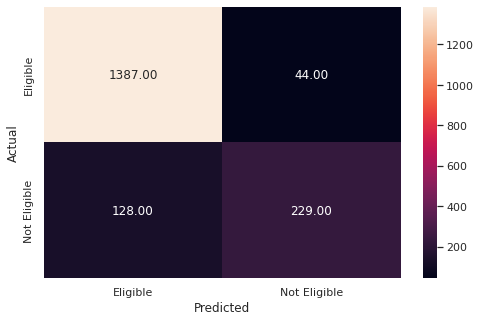

In [48]:
# Checking performance on the test data
y_pred_test_rf = rf_estimator_wt.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

### **Tuning the Random Forest**

In [49]:
# Choosing the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.20, 1: 0.80}, random_state = 1, oob_score=True)


# Grid of parameters to choose from

# params_rf = {  
#         "n_estimators": [3000, 5000],
#         "max_depth" : np.arange(2,30),
#         "min_samples_split" : [2],
#         "min_samples_leaf": [3],
#         "max_features": ['auto'],
#         "max_samples" : [0.9,1], 
#         "class_weight": ['balanced', {0: 0.2, 1: 0.8}]
# }


# params_rf = {
#             'bootstrap': [True],
#             'max_depth': [80, 90, 100, 110],
#             'max_features': [2, 3],
#             'min_samples_leaf': [3, 4, 5],
#             'min_samples_split': [8, 10, 12],
#             'n_estimators': [250, 500, 1000, 3000]}

params_rf = { "min_samples_leaf": np.arange(1,15,5)
            ,"min_samples_split": np.arange(2,20,5)
            ,"max_features"     : ['auto']
            ,"n_estimators"     : np.arange(1000,1100,1000)
            ,"criterion"        : ['gini', 'entropy', 'log_loss']
             ,"bootstrap"       : [True, False]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)


# Runing the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5, n_jobs=-1)


#fiting the GridSearch on train dataset
grid_obj = grid_obj.fit(x_train, y_train)


# Seting the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_


# Fiting the best algorithm to the data. 
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, min_samples_leaf=11,
                       n_estimators=1000, oob_score=True, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      3340
           1       0.70      0.88      0.78       832

    accuracy                           0.90      4172
   macro avg       0.84      0.90      0.86      4172
weighted avg       0.92      0.90      0.91      4172



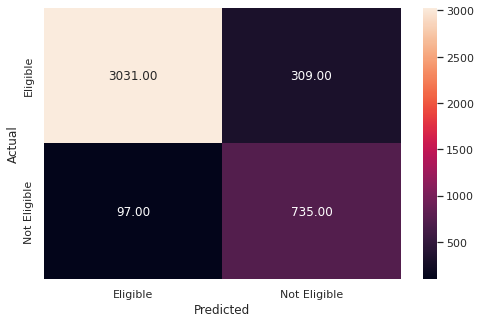

In [50]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1431
           1       0.67      0.77      0.72       357

    accuracy                           0.88      1788
   macro avg       0.80      0.84      0.82      1788
weighted avg       0.89      0.88      0.88      1788



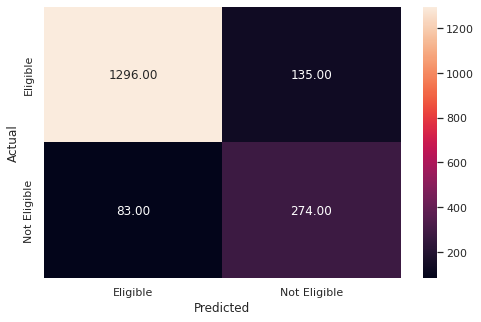

In [51]:
# Checking performace on test dataset
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)

metrics_score(y_test, y_pred_test_rf_tuned)

#### Ploting the Feature importance of the tuned Random Forest

<AxesSubplot:xlabel='Importance'>

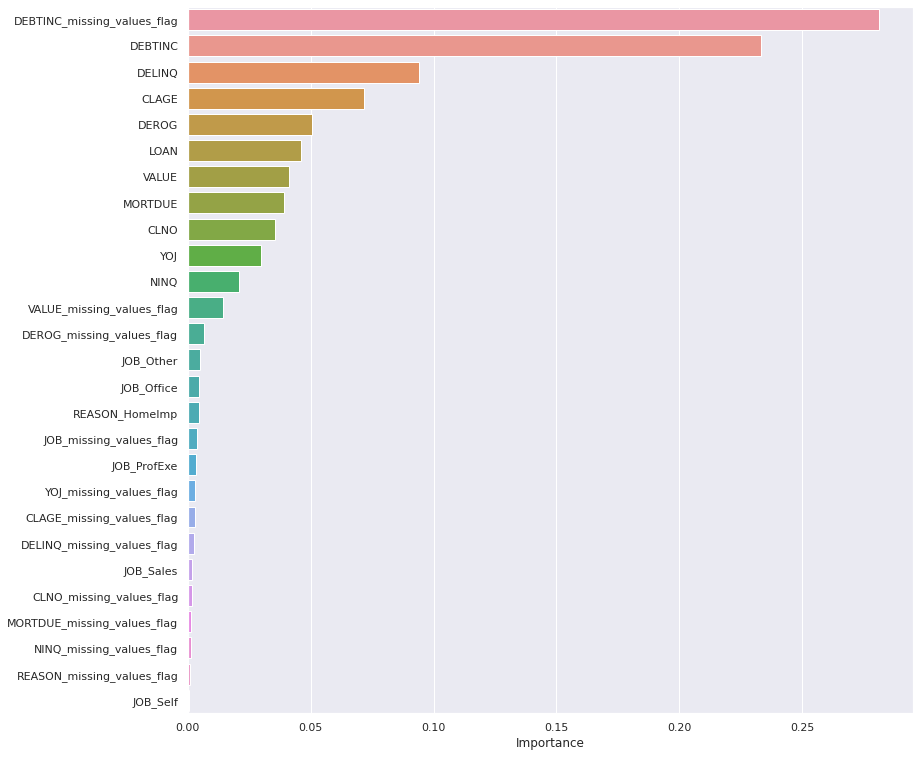

In [52]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset

importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

# **Comparing Model Performances**

In [53]:

def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores


##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores


##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [54]:
# Making the list of all the model names 
models = [model,dt, dtree_estimator, rf_estimator, rf_estimator_wt, rf_estimator_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])
    

# Mentioning the Model names in the list. 
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Decision Tree', 'Decision Tree Tuned', 'Random Forest', 'Random Forest Weighted', 'Random Forest Tuned'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test})
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Logistic Regression,0.795542,0.797539,0.004808,0.002801,0.137931,0.142857
1,Decision Tree,0.723873,0.714765,0.146635,0.148459,0.216312,0.204633
2,Decision Tree Tuned,0.669223,0.655481,0.263221,0.229692,0.222110,0.193853
3,Random Forest,0.727709,0.724832,0.143029,0.140056,0.219557,0.212766
4,Random Forest Weighted,0.727469,0.724832,0.133413,0.137255,0.210626,0.210300
5,Random Forest Tuned,0.674976,0.671141,0.248798,0.210084,0.220682,0.196850
